### <strong>第三次作品：學習分類器的評比實驗 </strong>
學號：711233112

姓名：留筠雅
<hr>

 <font color=skyblue>作品目標</font>：  
本次專題計畫旨在比較不同分類器的效果，通過對三組資料進行分類學習和評估。所選用的分類器包括：

- 多項式羅吉斯回歸 (Multinomial Logistic Regression)
- 支援向量機 (Support Vector Machine)
- 神經網絡 (Neural Network)

通過這個作品，希望為不同類型的問題提供分類器或是參數設定的選擇建議，並了解各個分類器在不同條件下的運作情況。
<hr>

### Yale Face資料集
38 人的人臉影像共 2410 張，每張大小 192×168。

導入套件

In [1]:
import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler   
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA    
from sklearn.svm import SVC,LinearSVC,LinearSVR
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

導入資料

In [2]:
D = scipy.io.loadmat('data/allFaces.mat')
faces = D['faces']
m = int(D['m'])
n = int(D['n'])
nfaces = np.ndarray.flatten(D['nfaces'])

X = faces.T # Data usual format of sample rows and feature columns
y = np.zeros((faces.shape[1], 1)) # Creating labels

j = 0
classes = list(range(len(nfaces)))
for i in nfaces:
    y[j:j+i] = classes.pop(0)
    j = j + i



C:\Users\f9006\AppData\Local\Temp\ipykernel_11632\1014338354.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  m = int(D['m'])
C:\Users\f9006\AppData\Local\Temp\ipykernel_11632\1014338354.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  n = int(D['n'])


1. 切割訓練資料與測試資料
2. 進行標準化

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=666)
scaler = StandardScaler()
X_train_ = scaler.fit_transform(X_train)
X_test_ = scaler.fit_transform(X_test)

### 使用原始資料訓練多元羅吉斯回歸模型

In [4]:
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)
clf_original_lbfgs= LogisticRegression(solver = 'lbfgs', **opts)# default

clf_original_lbfgs.fit(X_train_, y_train)
y_pred_lbfgs = clf_original_lbfgs.predict(X_test_)
# 測 試 資 料 之 準 確 率 回 報
print(f'accuracy for testing data under lbfgs:{accuracy_score(y_test, y_pred_lbfgs):.2%}\n')
print(classification_report(y_test, y_pred_lbfgs))



c:\Users\f9006\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy for testing data under lbfgs:96.47%

              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93        15
         1.0       1.00      1.00      1.00         9
         2.0       0.77      1.00      0.87        10
         3.0       0.91      0.91      0.91        11
         4.0       1.00      1.00      1.00        23
         5.0       1.00      1.00      1.00        12
         6.0       1.00      1.00      1.00        14
         7.0       0.85      1.00      0.92        11
         8.0       0.92      1.00      0.96        11
         9.0       0.92      1.00      0.96        11
        10.0       1.00      0.86      0.92         7
        11.0       1.00      1.00      1.00         9
        12.0       1.00      0.86      0.92        14
        13.0       1.00      1.00      1.00        12
        14.0       1.00      1.00      1.00        10
        15.0       1.00      0.90      0.95        10
        16.0       0.92      1.00  

" clf_original_newtoncg.fit(X_train_, y_train)\ny_pred_new = clf_original_newtoncg.predict(X_test_)\n# 測 試 資 料 之 準 確 率 回 報\nprint(f'accuracy for testing data under newton-cg:{accuracy_score(y_test, y_pred_new):.2%}\n')\nprint(classification_report(y_test, y_pred_new))\n\nclf_original_liblin.fit(X_train_, y_train)\ny_pred_liblin = clf_original_liblin.predict(X_test_)\n# 測 試 資 料 之 準 確 率 回 報\nprint(f'accuracy for testing data under liblinear:{accuracy_score(y_test, y_pred_liblin):.2%}\n')\nprint(classification_report(y_test, y_pred_liblin)) "

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 多元羅吉斯迴歸模型預測準確率為高達 96.47\% 。
- 原始資料訓練模型的運算時間約花25分鐘。
  

繪製特徵值由大而小的分佈，如 scree plot 與累積百分比的 pareto plot

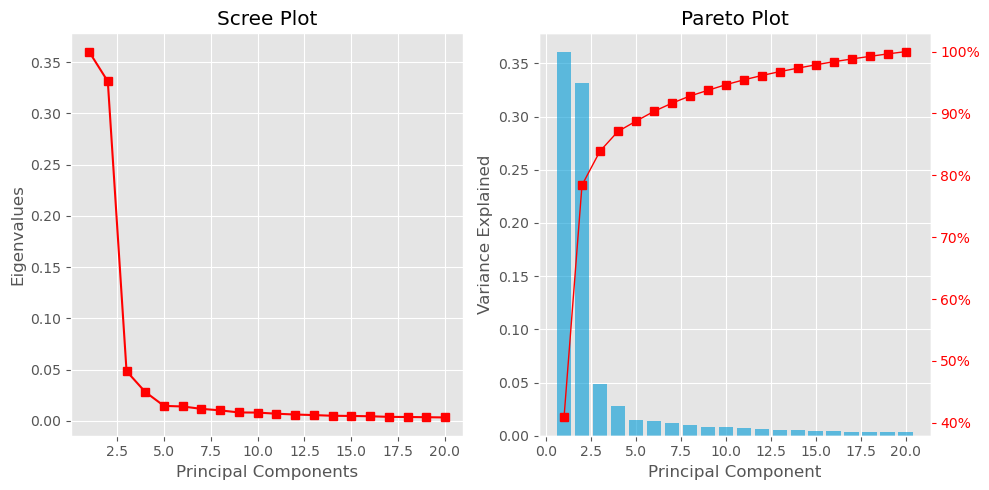

In [8]:
from matplotlib.ticker import PercentFormatter
pca = PCA(n_components = 20).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)
# plot scree plot

# Scree plot
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(np.arange(1, len(pca.explained_variance_ratio_)+1), 
           pca.explained_variance_ratio_, 
           marker = 's', 
           color = "red")

ax[0].set_xlabel('Principal Components')
ax[0].set_ylabel('Eigenvalues')
ax[0].set_title('Scree Plot')
ax[0].grid(True)

# Pareto plot
x = np.arange(1, 1+len(pca.explained_variance_ratio_))
ax[1].bar( x,
           pca.explained_variance_ratio_, 
           color = '#009ad6', 
           alpha = 0.6, 
           align = 'center', 
           label = 'Variance Explained')

ax_twinx = ax[1].twinx()
ax_twinx.plot(x,
              pca.explained_variance_ratio_.cumsum()/pca.explained_variance_ratio_.sum()*100, 
              marker='s', lw=1, 
              color="red")

ax_twinx.tick_params(axis='y', colors='red')
ax_twinx.yaxis.set_major_formatter(PercentFormatter())

ax[1].set_xlabel('Principal Component')
ax[1].set_ylabel('Variance Explained')
ax_twinx.grid()
ax[1].set_title('Pareto Plot')

plt.tight_layout()
plt.show()

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 觀察 Pareto plot 顯示，前六個主成分已經解釋了約 90 % 的原始變數的變異量。
- 接續利用 PCA 後資料訓練的模型，決定取 90\% 為成分比例。

### 使用主成分分析後的資料訓練多元羅吉斯回歸模型。

In [12]:
pca = PCA(n_components = 0.9).fit(X_train_)
Z_train = pca.transform(X_train_)
Z_test = pca.transform(X_test_)
opts = dict(tol = 1e-6, max_iter = int(1e6), verbose=1)

clf_pca_lbfgs= LogisticRegression(solver = 'lbfgs', **opts)# default


clf_pca_lbfgs.fit(Z_train, y_train)
y_pred_lbfgs = clf_pca_lbfgs.predict(Z_test)
print(f'accuracy for testing data under lbfgs:{clf_pca_lbfgs.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, y_pred_lbfgs))



c:\Users\f9006\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy for testing data under lbfgs:84.85%

              precision    recall  f1-score   support

         0.0       1.00      0.67      0.80        15
         1.0       1.00      0.67      0.80         9
         2.0       0.70      0.70      0.70        10
         3.0       0.92      1.00      0.96        11
         4.0       1.00      1.00      1.00        23
         5.0       1.00      0.75      0.86        12
         6.0       0.87      0.93      0.90        14
         7.0       0.73      1.00      0.85        11
         8.0       1.00      0.91      0.95        11
         9.0       0.67      0.91      0.77        11
        10.0       0.62      0.71      0.67         7
        11.0       0.83      0.56      0.67         9
        12.0       0.92      0.79      0.85        14
        13.0       1.00      1.00      1.00        12
        14.0       0.67      0.80      0.73        10
        15.0       0.67      0.80      0.73        10
        16.0       0.89      0.73  

c:\Users\f9006\anaconda3\envs\pytorch\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 多元羅吉斯迴歸模型預測準確率為高達 84.85\%，但比起原始資料準確率有降低 。
- PCA 的資料訓練模型的運算時間大幅降低，約1分鐘。

### 使用原始資料訓練 SVM 模型。

In [13]:
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))
# opts = dict(C = C, decision_function_shape = ’ovo’, \
# tol = 1e−6, max_iter = int(1e6))
clf_svm_linear = SVC(kernel="linear", **opts)

clf_svm_linear.fit(X_train_,y_train)
predictions=clf_svm_linear.predict(X_test_)
print(f'accuracy for testing data under linear:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions))



c:\Users\f9006\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy for testing data under linear:92.53%

              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89        15
         1.0       1.00      0.89      0.94         9
         2.0       0.77      1.00      0.87        10
         3.0       0.91      0.91      0.91        11
         4.0       0.92      1.00      0.96        23
         5.0       0.86      1.00      0.92        12
         6.0       0.82      1.00      0.90        14
         7.0       0.79      1.00      0.88        11
         8.0       1.00      1.00      1.00        11
         9.0       0.64      0.82      0.72        11
        10.0       1.00      0.86      0.92         7
        11.0       1.00      1.00      1.00         9
        12.0       1.00      0.79      0.88        14
        13.0       1.00      1.00      1.00        12
        14.0       0.77      1.00      0.87        10
        15.0       1.00      0.90      0.95        10
        16.0       1.00      1.00 

" clf_svm_rbf.fit(X_train_,y_train)\npredictions=clf_svm_rbf.predict(X_test_)\nprint(f'accuracy for testing data under rbf:{accuracy_score(y_test, predictions):.2%}\n')\nprint(classification_report(y_test, predictions))\n\nclf_svm_poly.fit(X_train_,y_train)\npredictions=clf_svm_poly.predict(X_test_)\nprint(f'accuracy for testing data under poly:{accuracy_score(y_test, predictions):.2%}\n')\nprint(classification_report(y_test, predictions))\n\nclf_svm_rest.fit(X_train_,y_train)\npredictions=clf_svm_rest.predict(X_test_)\nprint(f'accuracy for testing data under LinearSVC:{accuracy_score(y_test, predictions):.2%}\n')\nprint(classification_report(y_test, predictions)) "

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- SVM 模型預測準確率高達 92.53\%。

### 使用主成分分析後資料訓練 SVM 模型。

In [33]:
# PCA
C = 1 # SVM regularization parameter
opts = dict(C = C, tol = 1e-6, max_iter = int(1e6))

clf_svm_linear = SVC(kernel="linear", **opts)

clf_svm_linear.fit(Z_train,y_train)
predictions=clf_svm_linear.predict(Z_test)
print(f'accuracy for testing data under linear:{clf_svm_linear.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions))

c:\Users\f9006\anaconda3\envs\pytorch\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy for testing data under linear:87.55%

              precision    recall  f1-score   support

         0.0       0.91      0.67      0.77        15
         1.0       0.88      0.78      0.82         9
         2.0       0.71      1.00      0.83        10
         3.0       0.91      0.91      0.91        11
         4.0       0.96      0.96      0.96        23
         5.0       0.79      0.92      0.85        12
         6.0       0.82      1.00      0.90        14
         7.0       0.57      0.73      0.64        11
         8.0       1.00      1.00      1.00        11
         9.0       0.69      0.82      0.75        11
        10.0       0.86      0.86      0.86         7
        11.0       1.00      0.89      0.94         9
        12.0       1.00      0.86      0.92        14
        13.0       1.00      1.00      1.00        12
        14.0       0.71      1.00      0.83        10
        15.0       0.75      0.90      0.82        10
        16.0       0.91      0.91 

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- SVM 模型預測準確率高達 87.55\%。
- PCA 後的資料預測準確度比起原始資料有些微下降。

### 利用原始資料訓練 ANN 模型

In [68]:
hidden_layers = (30,)
activation = 'logistic'
opts = dict(hidden_layer_sizes = hidden_layers , verbose = False, \
activation = activation, tol = 1e-6, max_iter = int(1e6))


clf_MLP_adam = MLPClassifier(solver = 'adam', **opts) 


clf_MLP_adam.fit(X_train_, y_train)
predictions = clf_MLP_adam.predict(X_test_)
print(f'accuracy for testing data under adam:{accuracy_score(y_test, predictions):.2%}\n')
print(classification_report(y_test, predictions))


c:\Users\f9006\anaconda3\envs\pytorch\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy for testing data under adam:94.40%

              precision    recall  f1-score   support

         0.0       0.75      0.80      0.77        15
         1.0       1.00      0.89      0.94         9
         2.0       0.83      1.00      0.91        10
         3.0       1.00      0.91      0.95        11
         4.0       1.00      0.96      0.98        23
         5.0       1.00      0.92      0.96        12
         6.0       1.00      1.00      1.00        14
         7.0       1.00      1.00      1.00        11
         8.0       0.92      1.00      0.96        11
         9.0       1.00      1.00      1.00        11
        10.0       0.70      1.00      0.82         7
        11.0       1.00      1.00      1.00         9
        12.0       1.00      1.00      1.00        14
        13.0       1.00      1.00      1.00        12
        14.0       0.91      1.00      0.95        10
        15.0       1.00      0.90      0.95        10
        16.0       1.00      1.00   

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- ANN 模型預測準確率高達 94.40\%。

### 利用主成分分析後的資料訓練 ANN 模型

In [69]:
# PCA
clf_MLP_adam.fit(Z_train, y_train)
predictions = clf_MLP_adam.predict(Z_test)
print(f'accuracy for testing data under adam:{clf_MLP_adam.score(Z_test, y_test):.2%}\n')
print(classification_report(y_test, predictions))
     


c:\Users\f9006\anaconda3\envs\pytorch\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy for testing data under adam:82.57%

              precision    recall  f1-score   support

         0.0       1.00      0.73      0.85        15
         1.0       0.73      0.89      0.80         9
         2.0       0.64      0.70      0.67        10
         3.0       1.00      1.00      1.00        11
         4.0       1.00      1.00      1.00        23
         5.0       0.90      0.75      0.82        12
         6.0       0.72      0.93      0.81        14
         7.0       0.71      0.91      0.80        11
         8.0       0.92      1.00      0.96        11
         9.0       0.82      0.82      0.82        11
        10.0       0.83      0.71      0.77         7
        11.0       1.00      0.78      0.88         9
        12.0       0.92      0.86      0.89        14
        13.0       0.71      1.00      0.83        12
        14.0       0.89      0.80      0.84        10
        15.0       0.62      0.80      0.70        10
        16.0       1.00      0.82   

**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- ANN 模型預測準確率高達 82.57\%。
- PCA 後的資料預測準確度比起原始資料有些微下降。

繪製 confusion matrix 來觀察每一個類別被分類的準確度，這裡選擇 adam 演算法所計算的 ANN 模型。

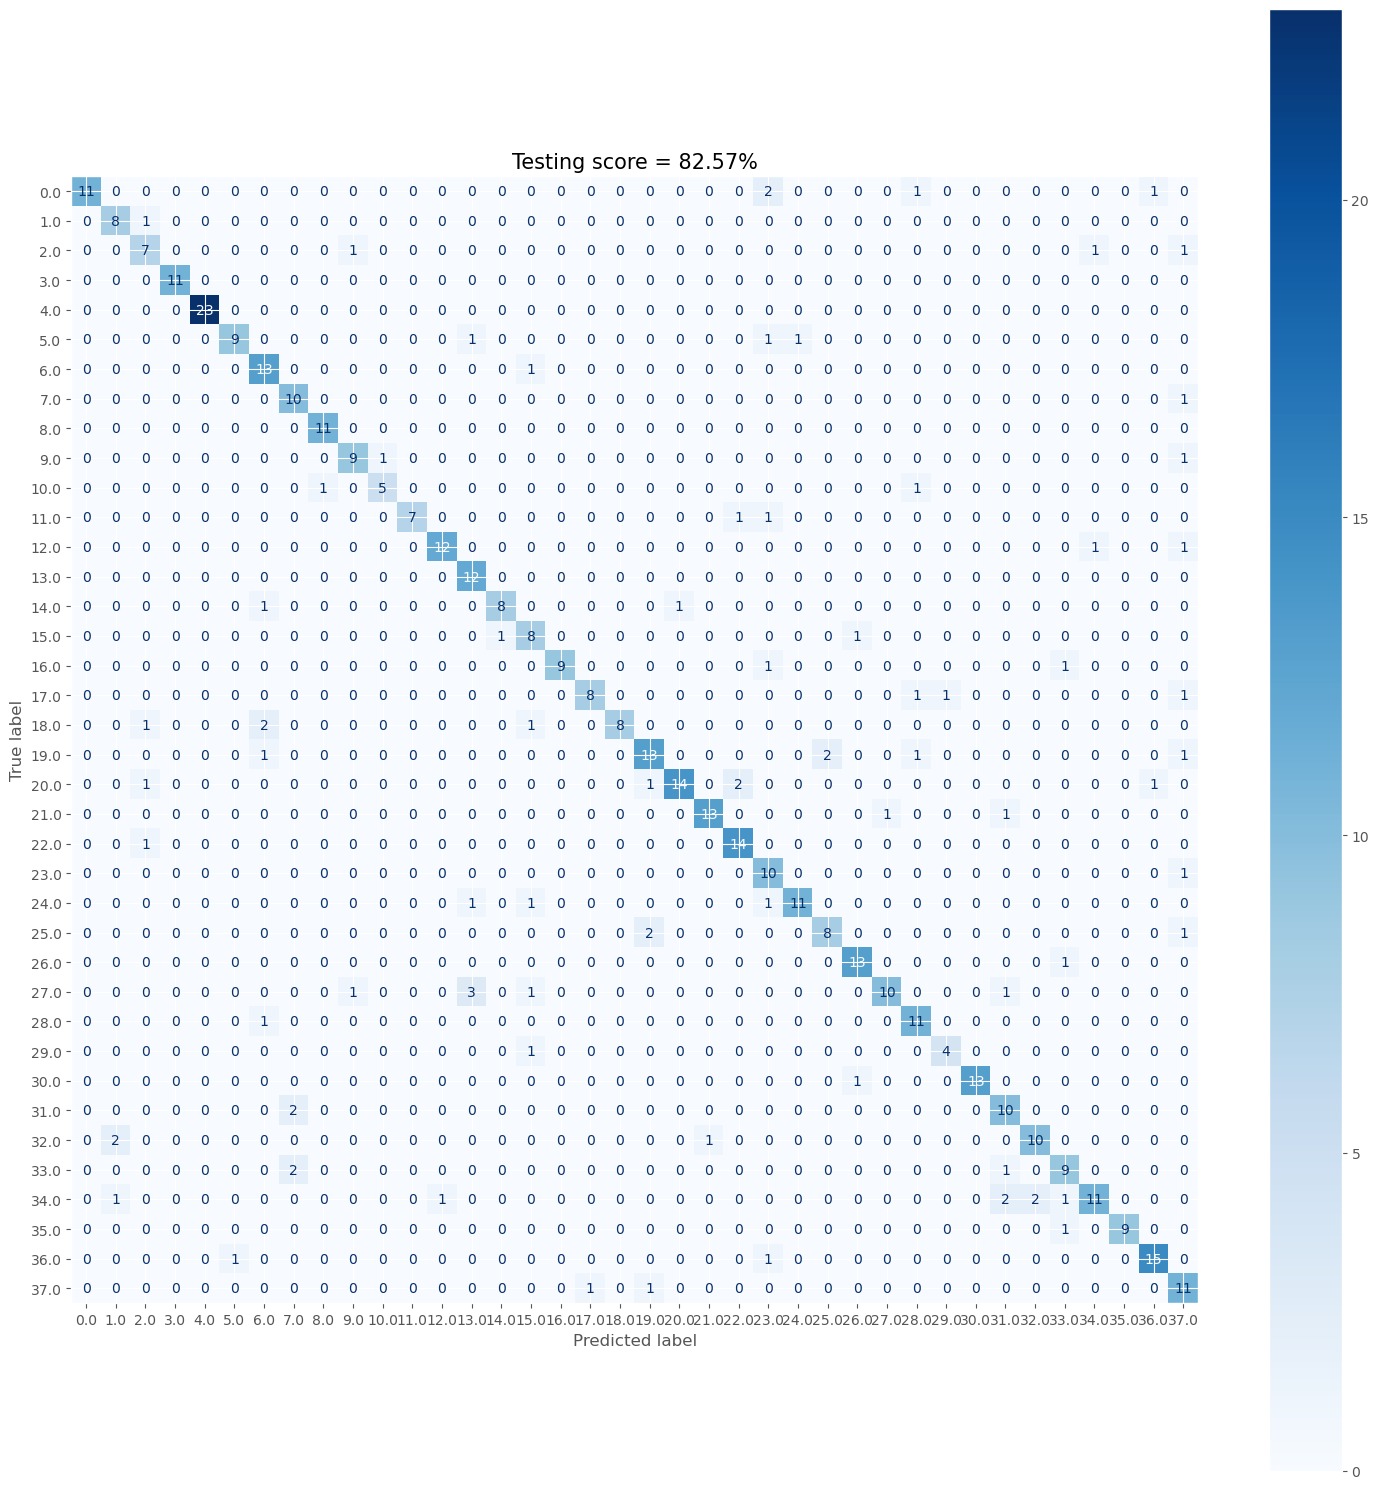

In [71]:
score = 100*accuracy_score(y_test, predictions)
title = 'Testing score = {:.2f}%'.format(score)

cm = confusion_matrix(y_test, predictions)


disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_MLP_adam.classes_,)


fig, ax = plt.subplots(figsize=(15,15))


disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation='horizontal')
plt.title(title, fontsize=15)

plt.tight_layout()
plt.show()


**<font color=skyblue>對執行結果的觀察紀錄：</font>**
- 從混淆矩陣可以看出第27個人的臉就有被預測3次是第13個人的臉。
- 從對角線上來看y值資料有些不平衡問題，有些格數很小，可能與切割資料有關。

<hr>

#### **<font color=	#2E8B57 >原始資料的模型訓練觀察結果</font>**
比較 3 組學習器的模型預測準確率，從每個學習器裡取最高測準確率，在原始資料中以多項式羅吉斯回歸學習器預測準確率最高。
 - 多項式羅吉斯回歸 96.47\%
 - 支援向量機 92.53\%
 - 神經網路 94.40\%
#### **<font color=	#2E8B57 >主成分分析後的資料的模型訓練觀察結果</font>**
在 PCA 資料中以支援向量機學習器預測準確率最高。
 - 多項式羅吉斯回歸 84.85\%
 - 支援向量機 87.55\%
 - 神經網路 82.57\%
#### **<font color=#FA8072> 整體觀察結果：</font>**
1. 以 yale faces 資料集來說，這三種學習分類器使用原始資料來預測的效果皆不錯，但要注意原始資料未經 PCA 降維，所需的訓練時間會很長，最長有25分鐘，且這還是調整參數下的時間。
2. 有主成分分析的資料整體而言會降低一些模型預測準確率。
3. 學習器內不同參數的調整對模型訓練的效果影響巨大。
<hr>